In [38]:
import utils
from Graph import Graph
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Question 3

### Génération de G
En utilisant la fonction generate_random_graph(), nous allons générer un graphe orienté G.

In [39]:
nb_vertices = 20 # Nombre de sommets du graph G
nb_edges = 40   # Nombre d'arc du graph G
bounds = 10     # Les poids du graph G seront entre [-bound,bound]

G = utils.generate_random_graph(nb_vertices, nb_edges, bounds)

dist, _, paths = utils.relaxation(G,src=0)
assert not utils.has_negative_cycle(G.edges, dist)

### Affichage de G

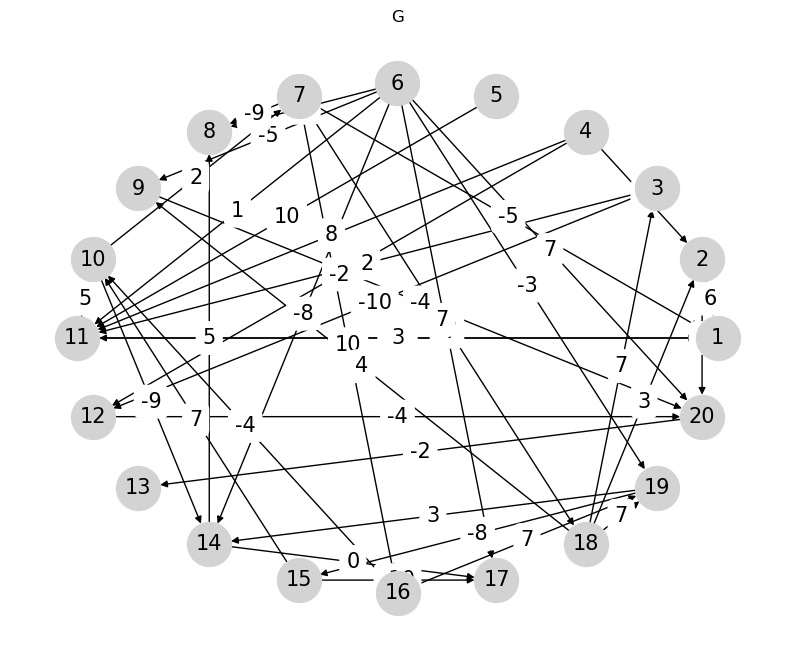

In [40]:
G.draw_graph('G')

### Construction de G1,G2,G3 et H 
En utilisant la fonction generate_weighted_graph(), nous allons générer les graphes G1,G2,G3 et H à partir du graphe G généré précedement.

In [41]:
G1 = Graph.generate_weighted_graph(G,bounds)
G2 = Graph.generate_weighted_graph(G,bounds)
G3 = Graph.generate_weighted_graph(G,bounds)
H = Graph.generate_weighted_graph(G,bounds)

### Affichage de G1,G2,G3 et H 

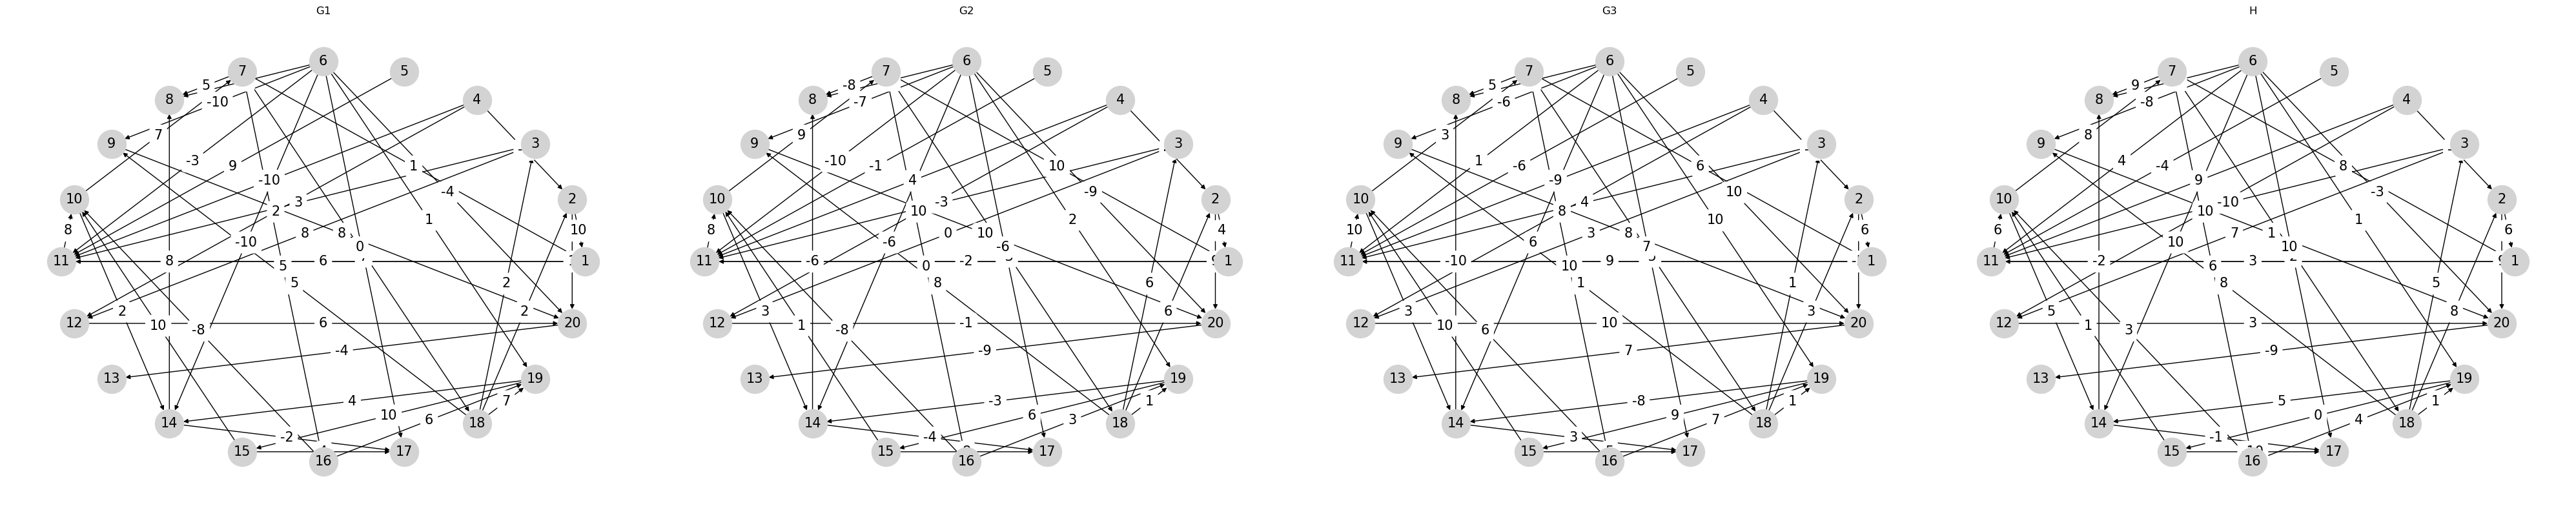

In [42]:
Graph.draw_graphs([G1, G2, G3, H],['G1', 'G2', 'G3', 'H'])

# Question 4

### Application de Bellman-Ford sur G1,G2,G3 et H

In [43]:
# On séléction d'abord un sommet source avec la fonction get_best_src_node() qui retourne un sommet auquel on peut atteindre au moins |nombre d'arrête| / 2 sommets
source = utils.get_best_src_node(G)

# On utilise la fonction bellman_ford sur G1,G2,G3 et H en considérant source comme sommet source de l'algorithme
_,_,path_G1 = G1.bellman_ford(source)
_,_,path_G2 = G2.bellman_ford(source)
_,_,path_G3 = G3.bellman_ford(source)
_,_,path_H = H.bellman_ford(source)

### Déterminer l’union des arborescences de G1,G2,G3 et H

On calcule l'union des arborescences en utilisant la fonction union_shortest_paths() 

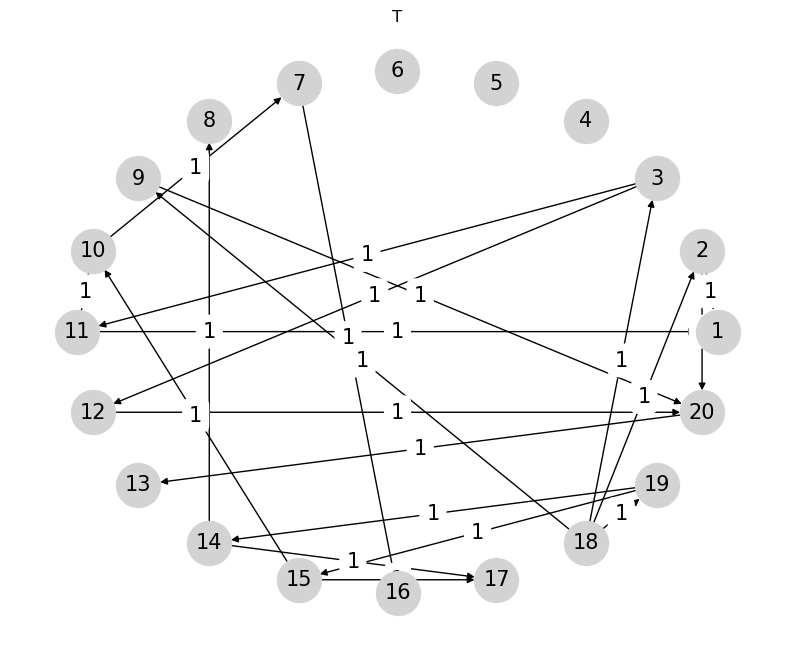

In [44]:
# On récupére la liste des arborescences
arborescences_list = [path_G1,path_G2,path_G3,path_H] 

# On calcule l'union des arborescences
T = Graph.union_shortest_paths(arborescences_list, G.vertices) 
T.draw_graph('T')

# Question 5

### Application de l’algorithme GloutonFas 

In [45]:
ordre_T = T.gloutonFas()

# Question 6 

### Application de l'algorithme de Bellman Ford sur H en utilisant l'ordre obtenu avec l'algorithme GLoutonFas

In [46]:
# On applique Bellman ford sur H
resultats, nb_iteration, paths = H.bellman_ford(source, ordre_T)

# Affichage de Bellman Ford
utils.display_bellman_ford_results(resultats,nb_iteration)

Résultats de l'algorithme de Bellman-Ford :
-------------------------------------------
Distances les plus courtes :
Vers le sommet 1 : -2
Vers le sommet 2 : 8
Vers le sommet 3 : 5
Vers le sommet 4 : inf
Vers le sommet 5 : inf
Vers le sommet 6 : inf
Vers le sommet 7 : 9
Vers le sommet 8 : 4
Vers le sommet 9 : 8
Vers le sommet 10 : 1
Vers le sommet 11 : -5
Vers le sommet 12 : 12
Vers le sommet 13 : 0
Vers le sommet 14 : 6
Vers le sommet 15 : 1
Vers le sommet 16 : 15
Vers le sommet 17 : -9
Vers le sommet 18 : 0
Vers le sommet 19 : 1
Vers le sommet 20 : 9
-------------------------------------------
L'algorithme a convergé en 1 itérations.


# Question 7

### Application de l'algorithme de Bellman Ford en utilisant un ordre aléatoire

In [47]:
# Génrer un ordre aléatoire avec la fonction get_random_order()
random_ordre = utils.get_random_order(H)

# Application de l'algorithme bellman_ford sur H en utilisant l'ordre aléatoire
resultats, nb_iteration, paths = H.bellman_ford(source, random_ordre)

# Affichage de Bellman Ford
utils.display_bellman_ford_results(resultats,nb_iteration)

Résultats de l'algorithme de Bellman-Ford :
-------------------------------------------
Distances les plus courtes :
Vers le sommet 1 : -2
Vers le sommet 2 : 8
Vers le sommet 3 : 5
Vers le sommet 4 : inf
Vers le sommet 5 : inf
Vers le sommet 6 : inf
Vers le sommet 7 : 9
Vers le sommet 8 : 4
Vers le sommet 9 : 8
Vers le sommet 10 : 1
Vers le sommet 11 : -5
Vers le sommet 12 : 12
Vers le sommet 13 : 0
Vers le sommet 14 : 6
Vers le sommet 15 : 1
Vers le sommet 16 : 15
Vers le sommet 17 : -9
Vers le sommet 18 : 0
Vers le sommet 19 : 1
Vers le sommet 20 : 9
-------------------------------------------
L'algorithme a convergé en 3 itérations.


# Question 8

### Comparaison des résultats 

Dans la question 6, nous avons obtenu 1 itération.

Dans la question 7, nous avons obtenu 3 itérations.

Ainsi, en comparant les résultats, on constate que l'utilisation de l'ordre obtenu avec l'algorithme GLoutonFas a permis de trouver les plus courts chemins avec seulement 1 itération, tandis que l'utilisation d'un ordre tiré aléatoirement a nécessité 3 itérations.

Cela suggère que l'ordre obtenu avec l'algorithme GLoutonFasa a permis de trouver plus rapidement les plus courts chemins dans le graphe H par rapport à l'ordre aléatoire.

# Question 9

### Généreration d'instances aléatoires pour tester 

In [48]:
nb_graphe = 20 # Nombre de graphes a générer

# On utilise la fonction get_greedyfas_stat() pour générer des graphes pour tester avec les deux méthodes
stat, converged_in_ordered, converged_in_glouton  = utils.get_greedyfas_stat(G,nb_graphe)

# On affiche les résultats obtenus
print("Nombre d'itération pour converger avec l'ordre glouton :", converged_in_ordered)
print("Nombre d'itération pour converger avec l'ordre aléatoire :", converged_in_glouton)
print("Amélioration de la méthode avec l'ordre glouton par rapport à un ordre aléatoire :", stat, "%")

Nombre d'itération pour converger avec l'ordre glouton : 3
Nombre d'itération pour converger avec l'ordre aléatoire : 5
Amélioration de la méthode avec l'ordre glouton par rapport à un ordre aléatoire : 40.0 %


Les résultats obtenus lors de l'exécution de la fonction get_greedyfas_stat révèlent que, en utilisant l'ordre glouton, l'algorithme a convergé en 3 itérations, tandis qu'avec un ordre aléatoire, il a fallu 4 itérations pour atteindre la convergence. Cela indique que l'approche gloutonne a permis d'obtenir une convergence plus rapide par rapport à l'approche aléatoire. En effet, l'amélioration de la méthode avec l'ordre glouton par rapport à un ordre aléatoire est de 25.0 %. Ce pourcentage représente la réduction du nombre d'itérations nécessaires pour atteindre la convergence en utilisant l'ordre glouton par rapport à l'ordre aléatoire. Ces résultats soulignent l'efficacité de l'approche gloutonne dans la résolution du problème considéré, en réduisant le nombre d'itérations nécessaires pour obtenir la solution souhaitée.

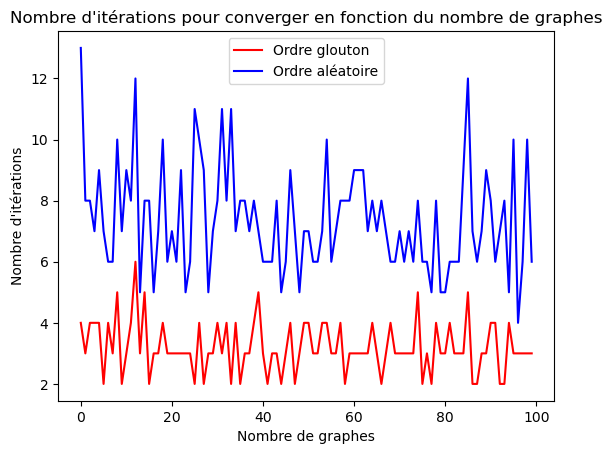

In [55]:
nb_vertices = 50
nb_edges = 100
bounds = 10
nb_graphs = 100
stats = []
ordered_i=[]
not_ordered_i = []

for i in range(nb_graphs):
    random_graph = utils.generate_random_graph(nb_vertices, nb_edges, bounds)
    (_, ordered, not_ordered) = utils.get_greedyfas_stat(random_graph, 4)
    ordered_i.append(ordered)
    not_ordered_i.append(not_ordered)

# Extraction des données de convergence
converged_ordered = [convergence[0] for convergence in stats]
converged_not_ordered = [convergence[1] for convergence in stats]

# Création du graphe pour les statistiques de convergence
plt.plot(range(nb_graphs), ordered_i, 'r', label="Ordre glouton")
plt.plot(range(nb_graphs), not_ordered_i, 'b', label="Ordre aléatoire")
plt.xlabel("Nombre de graphes")
plt.ylabel("Nombre d'itérations")
plt.title("Nombre d'itérations pour converger en fonction du nombre de graphes")
plt.legend()

# Question 10

### Tester avec différents nombre de graphe

In [49]:
# Nombre de graphes à générer
nb_graphes = [10, 50, 100, 200, 300, 400, 500]

# Liste pour stocker les résultats des statistiques
stats_amelioration = []
stats_convergence = []

# Test de la fonction get_greedyfas_stat pour chaque nombre de graphes
for nb_graphe in nb_graphes:
    print("Nombre de graphes : ", nb_graphe)
    stat, converged_in_ordered, converged_in_glouton = utils.get_greedyfas_stat(G, nb_graphe)
    stats_amelioration.append(stat)
    stats_convergence.append((converged_in_ordered, converged_in_glouton))
    print("Amélioration de la méthode avec l'ordre glouton pour", nb_graphe, "graphes :", stat, "%")
    print()
    
    print("Nombre d'itération pour converger avec l'ordre glouton :", converged_in_ordered)
    print("Nombre d'itération pour converger avec l'ordre aléatoire :", converged_in_glouton)

Nombre de graphes :  10
Amélioration de la méthode avec l'ordre glouton pour 10 graphes : 33.33333333333333 %

Nombre d'itération pour converger avec l'ordre glouton : 2
Nombre d'itération pour converger avec l'ordre aléatoire : 3
Nombre de graphes :  50
Amélioration de la méthode avec l'ordre glouton pour 50 graphes : 40.0 %

Nombre d'itération pour converger avec l'ordre glouton : 3
Nombre d'itération pour converger avec l'ordre aléatoire : 5
Nombre de graphes :  100
Amélioration de la méthode avec l'ordre glouton pour 100 graphes : 25.0 %

Nombre d'itération pour converger avec l'ordre glouton : 3
Nombre d'itération pour converger avec l'ordre aléatoire : 4
Nombre de graphes :  200
Amélioration de la méthode avec l'ordre glouton pour 200 graphes : 0.0 %

Nombre d'itération pour converger avec l'ordre glouton : 3
Nombre d'itération pour converger avec l'ordre aléatoire : 3
Nombre de graphes :  300
Amélioration de la méthode avec l'ordre glouton pour 300 graphes : 25.0 %

Nombre d'ité

### Graphe de l'amélioration de la méthode avec l'ordre glouton en fonction du nombre de graphes

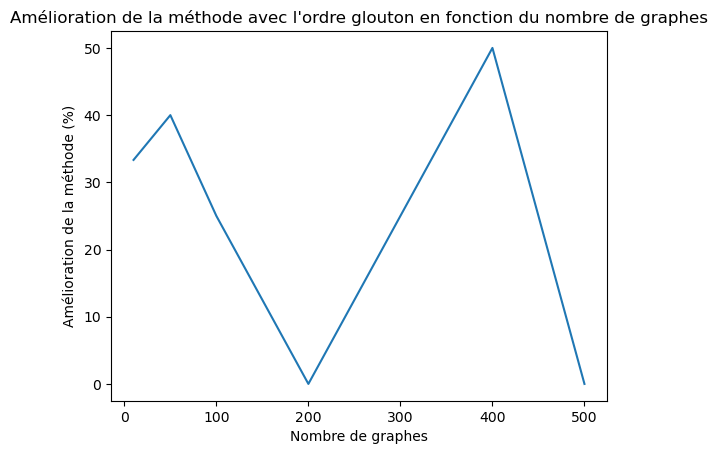

In [50]:
# Création du graphe pour la fonction stat
plt.plot(nb_graphes, stats_amelioration)
plt.xlabel("Nombre de graphes")
plt.ylabel("Amélioration de la méthode (%)")
plt.title("Amélioration de la méthode avec l'ordre glouton en fonction du nombre de graphes")
plt.show()

### Graphe du nombre d'itérations pour converger en fonction du nombre de graphes 

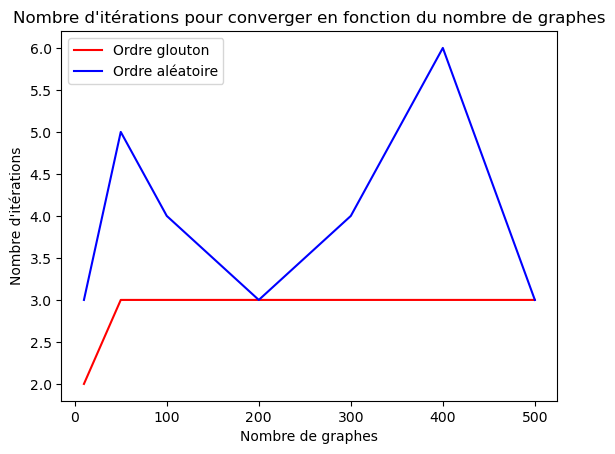

In [51]:
# Extraction des données de convergence
converged_ordered = [convergence[0] for convergence in stats_convergence]
converged_glouton = [convergence[1] for convergence in stats_convergence]

# Création du graphe pour les statistiques de convergence
plt.plot(nb_graphes, converged_ordered, 'r', label="Ordre glouton")
plt.plot(nb_graphes, converged_glouton, 'b', label="Ordre aléatoire")
plt.xlabel("Nombre de graphes")
plt.ylabel("Nombre d'itérations")
plt.title("Nombre d'itérations pour converger en fonction du nombre de graphes")
plt.legend()
plt.show()

# Question 11

On utilise la fonction generate_level_graph() pour générer un graphe par niveau avec 4 sommets par
niveau et 2500 niveaux où les sommets du niveau j précédent tous les sommets du niveau j + 1
et où pour chaque arc on a un poids tiré de manière uniforme et aléatoire parmi les entiers dans
l’intervalle [−10, 10]. 

In [52]:
nb_level = 2500 # Nombre de niveau
nb_vertices_per_level = 4 # Nombre de sommets par niveau
bound = 10

level_graph = utils.generate_level_graph(nb_level, bound)

### Teste de la méthode avec prétraitement avec le graphe par niveau

In [53]:
nb_graphe = 20 # Nombre de graphes a générer

# On utilise la fonction get_greedyfas_stat() pour générer des graphes pour tester avec les deux méthodes
stat, converged_in_ordered, converged_in_glouton  = utils.get_greedyfas_stat(level_graph,nb_graphe)

# On affiche les résultats obtenus
print("Nombre d'itération pour converger avec l'ordre glouton :", converged_in_ordered)
print("Nombre d'itération pour converger avec l'ordre aléatoire :", converged_in_glouton)
print("Amélioration de la méthode avec l'ordre glouton par rapport à un ordre aléatoire :", stat, "%")

Nombre d'itération pour converger avec l'ordre glouton : 2
Nombre d'itération pour converger avec l'ordre aléatoire : 2
Amélioration de la méthode avec l'ordre glouton par rapport à un ordre aléatoire : 0.0 %
